In [477]:
import pandas as pd
import matplotlib.pyplot as plt
from data_process import empty_totalcharges_to_zero, set_types, set_seniorcitizen_values
from data_vis import cls_dist, violine_plots, pearson_corr, bar_plots
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [478]:
data = pd.read_csv('Telco-Customer-Churn.csv')

# OVERVIEW

In [479]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**customerID** - Customer ID  
**gender** - Whether the customer is a male or a female  
**SeniorCitizen** - Whether the customer is a senior citizen or not (1, 0)  
**Partner** - Whether the customer has a partner or not (Yes, No)  
**Dependents** - Whether the customer has dependents or not (Yes, No)  
**tenure** - Number of months the customer has stayed with the company  
**PhoneService** - Whether the customer has a phone service or not (Yes, No)  
**MultipleLines** - Whether the customer has multiple lines or not (Yes, No, No phone service)  
**InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)  
**OnlineSecurity** - Whether the customer has online security or not (Yes, No, No internet service)  
**OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)  
**DeviceProtection** - Whether the customer has device protection or not (Yes, No, No internet service)  
**TechSupport** - Whether the customer has tech support or not (Yes, No, No internet service)  
**StreamingTV** - Whether the customer has streaming TV or not (Yes, No, No internet service)  
**StreamingMovies** - Whether the customer has streaming movies or not (Yes, No, No internet service)  
**Contract** - The contract term of the customer (Month-to-month, One year, Two year)  
**PaperlessBilling** - Whether the customer has paperless billing or not (Yes, No)  
**PaymentMethod** - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
**MonthlyCharges** - The amount charged to the customer monthly  
**TotalCharges** - The total amount charged to the customer  
**Churn** - Whether the customer churned or not (Yes or No)  

Why TotalCharges is object?

In [481]:
for el in data['TotalCharges']:
    try:
        float(el)
    except:
        print(el)

In [482]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Set tenure, MonthlyCharges, TotalCharges types to float and others to category. For new clients with TotalCharges equals ' ' set it to 0.

In [483]:
data = empty_totalcharges_to_zero(data)


Set SeniorCitizen values to Yes and No.

In [484]:
data = set_seniorcitizen_values(data)

# VISUALISATION

### Class distribution

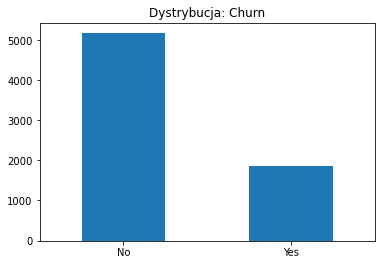

In [485]:
from data_vis import cls_dist
cls_dist(data)

In [486]:
data = set_types(data,False)

### Continous variables

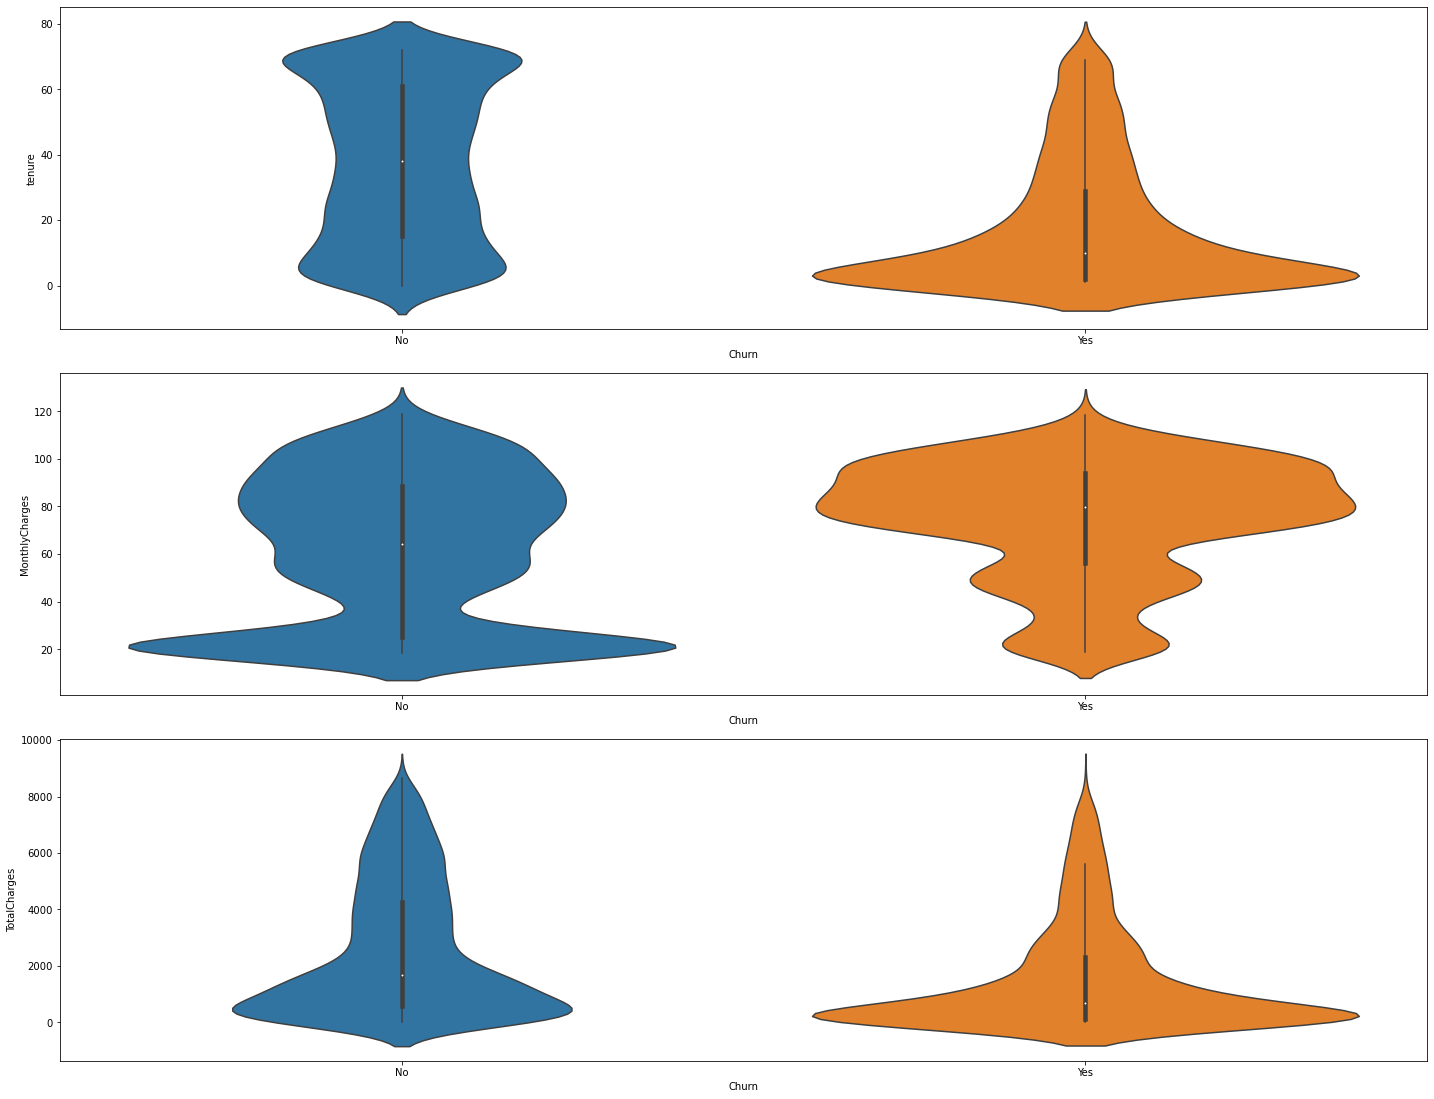

None

In [487]:
violine_plots(data)

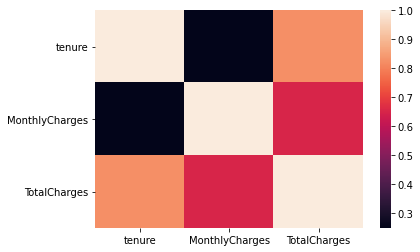

In [488]:
pearson_corr(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

### Demographic data

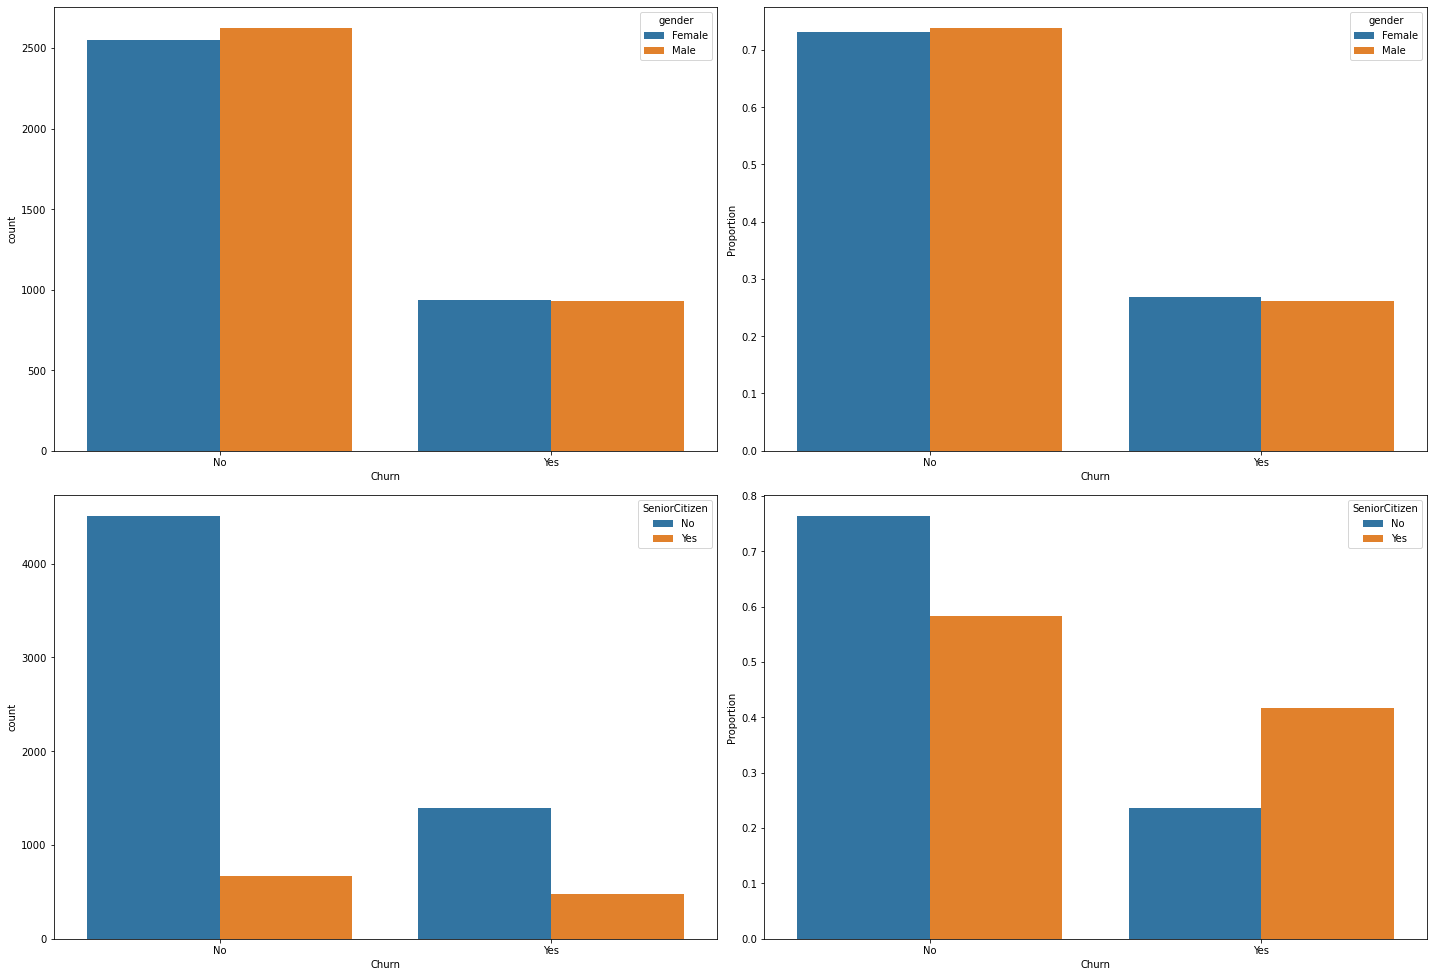

None

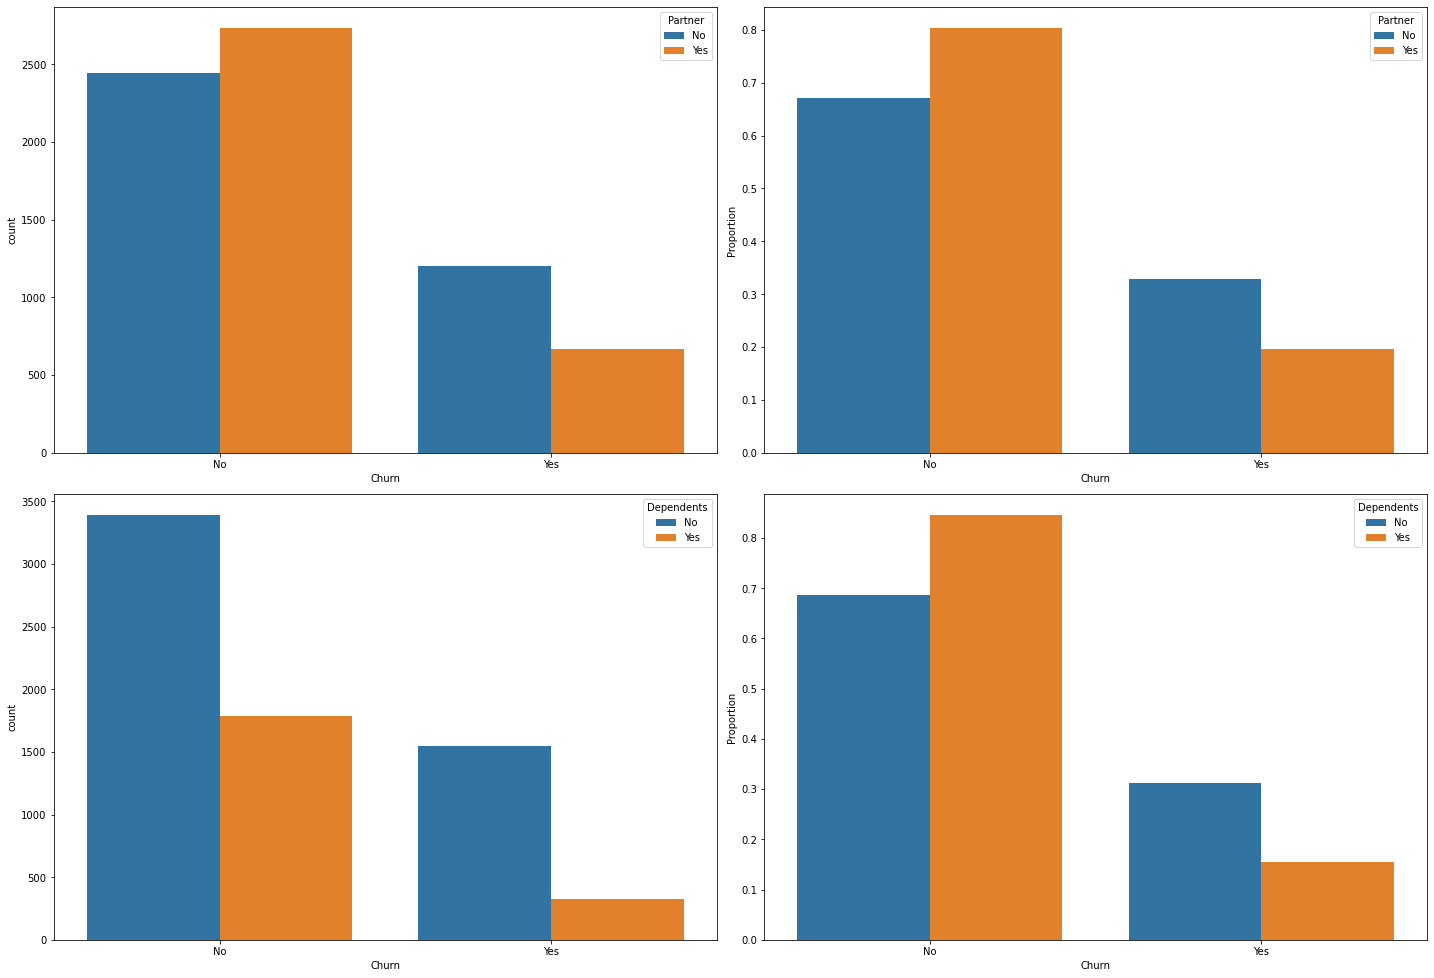

None

In [489]:
bar_plots(data, labels = ['gender', 'SeniorCitizen'])
bar_plots(data, labels = ['Partner','Dependents'])

### Services

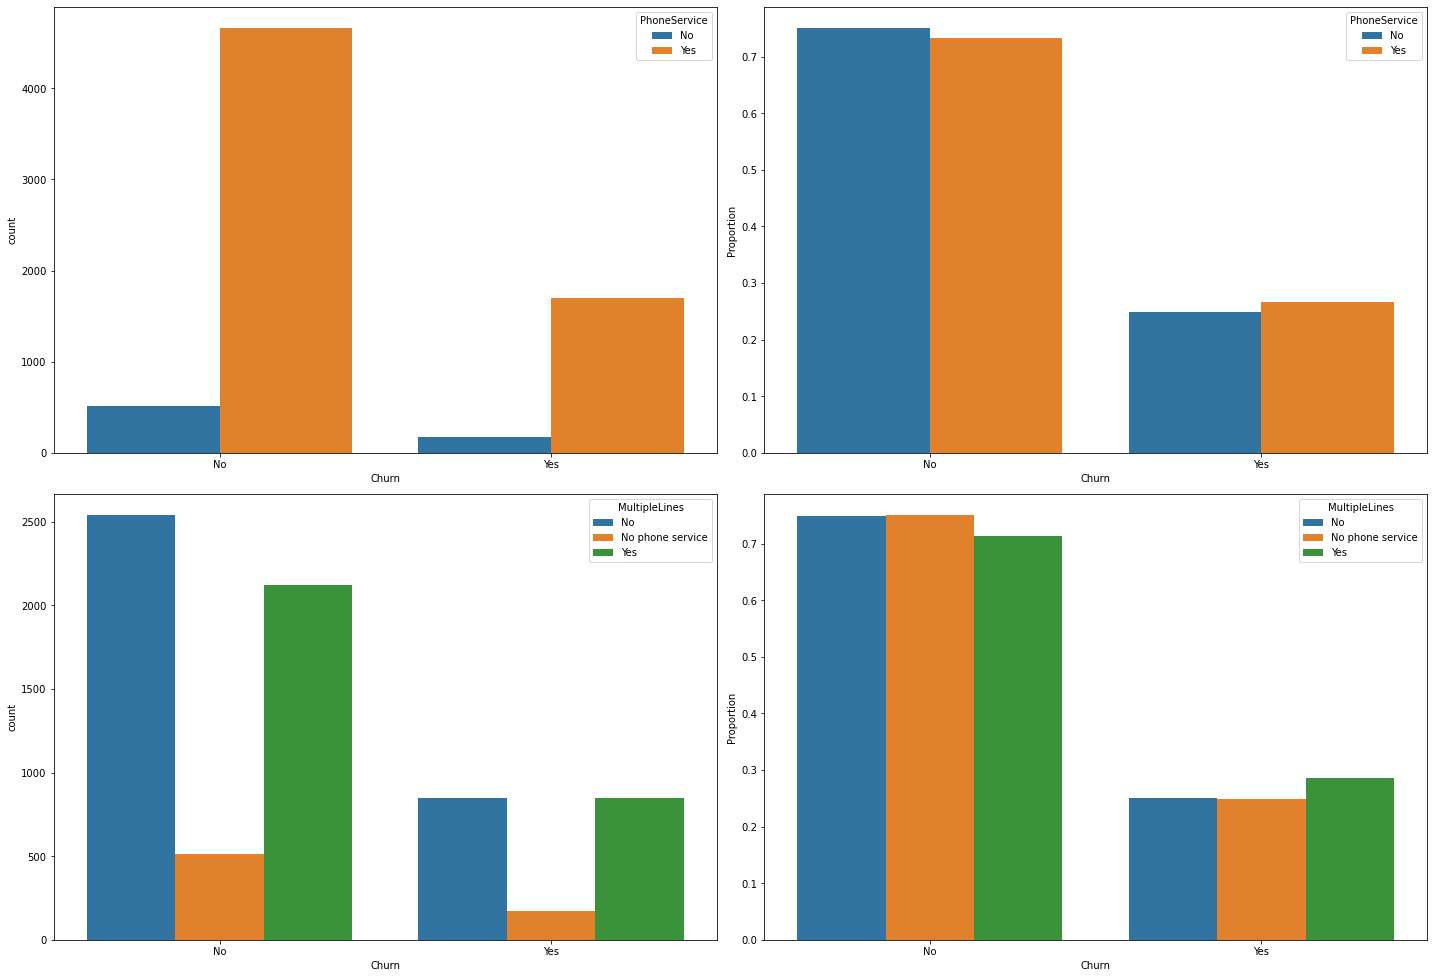

None

In [490]:
bar_plots(data, labels = ['PhoneService', 'MultipleLines'])



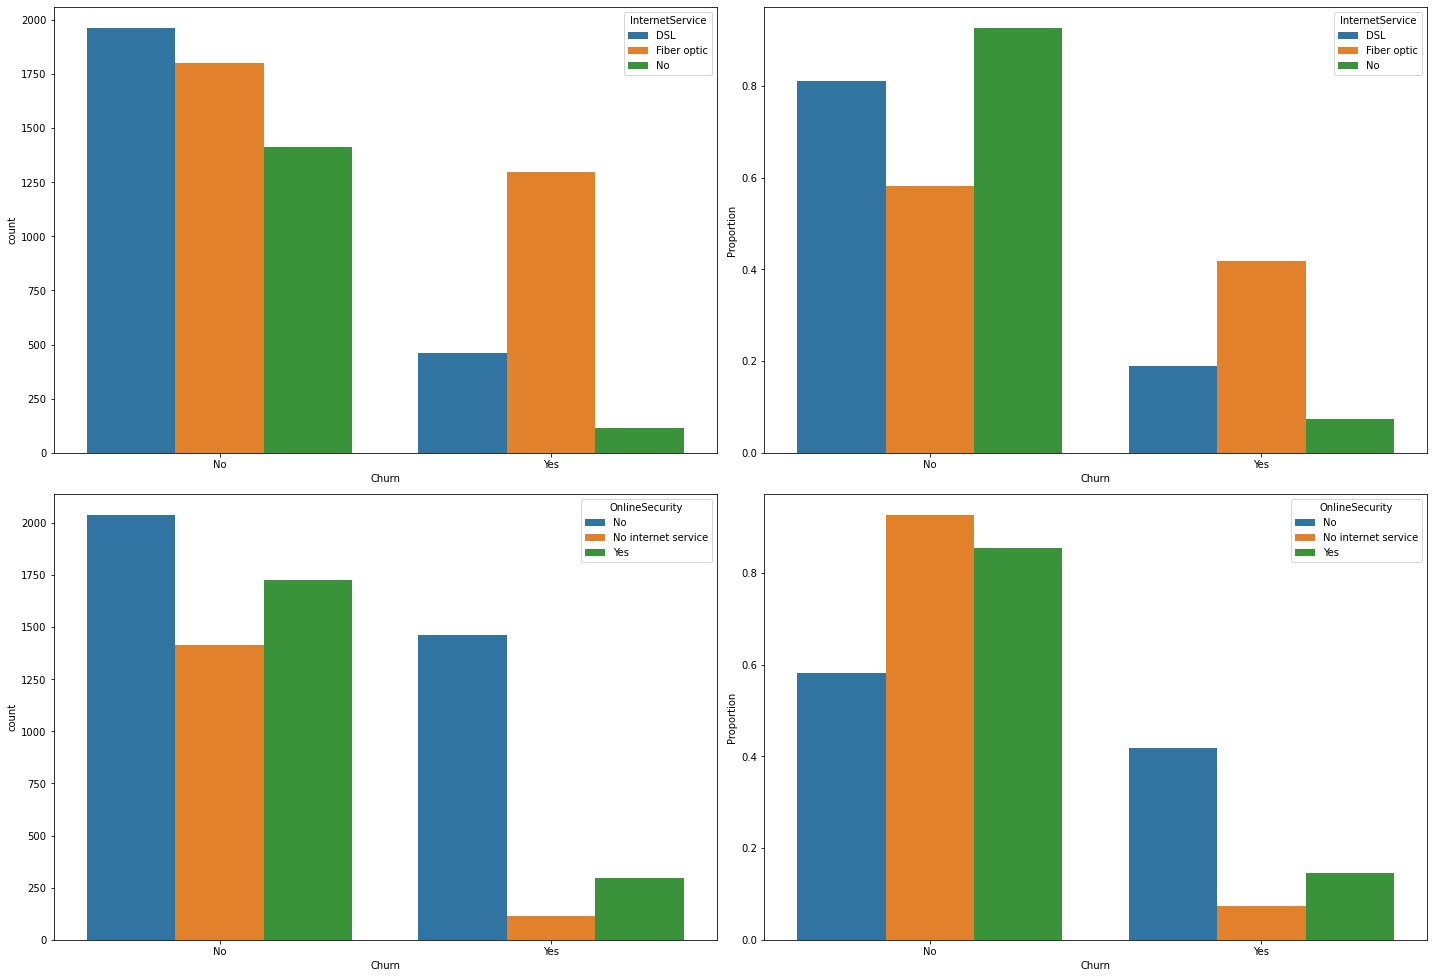

None

In [491]:
bar_plots(data,labels = [ 'InternetService', 'OnlineSecurity' ])


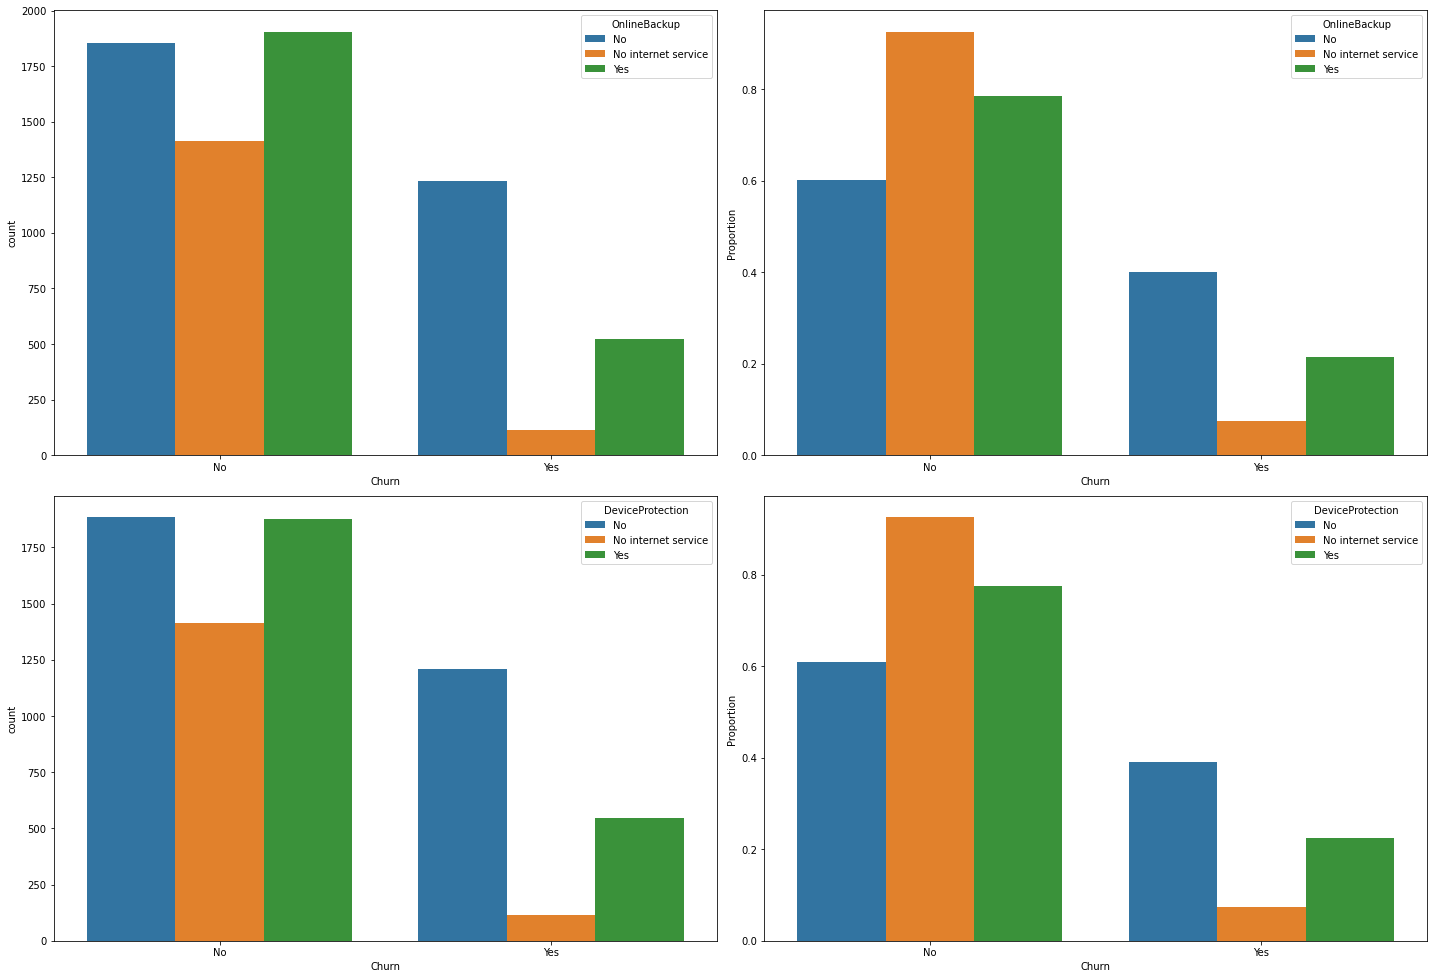

None

In [492]:
bar_plots(data,labels = [ 'OnlineBackup', 'DeviceProtection'])


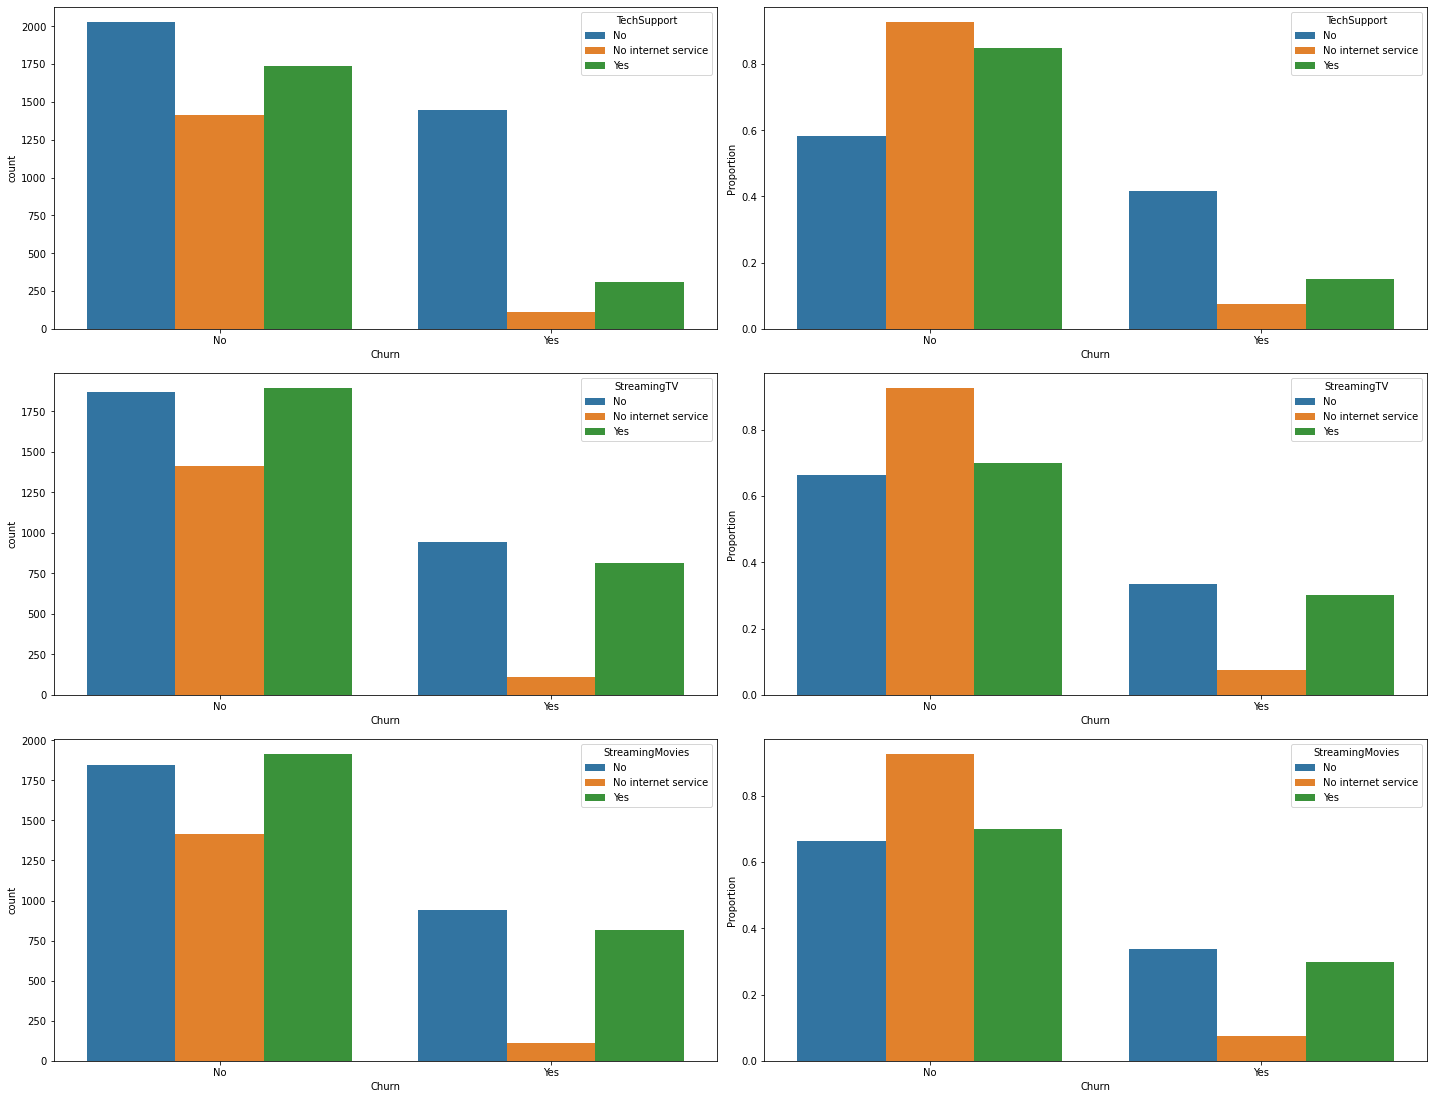

None

In [493]:
bar_plots(data,labels = [ 'TechSupport', 'StreamingTV', 'StreamingMovies' ])

## Based on InternetService

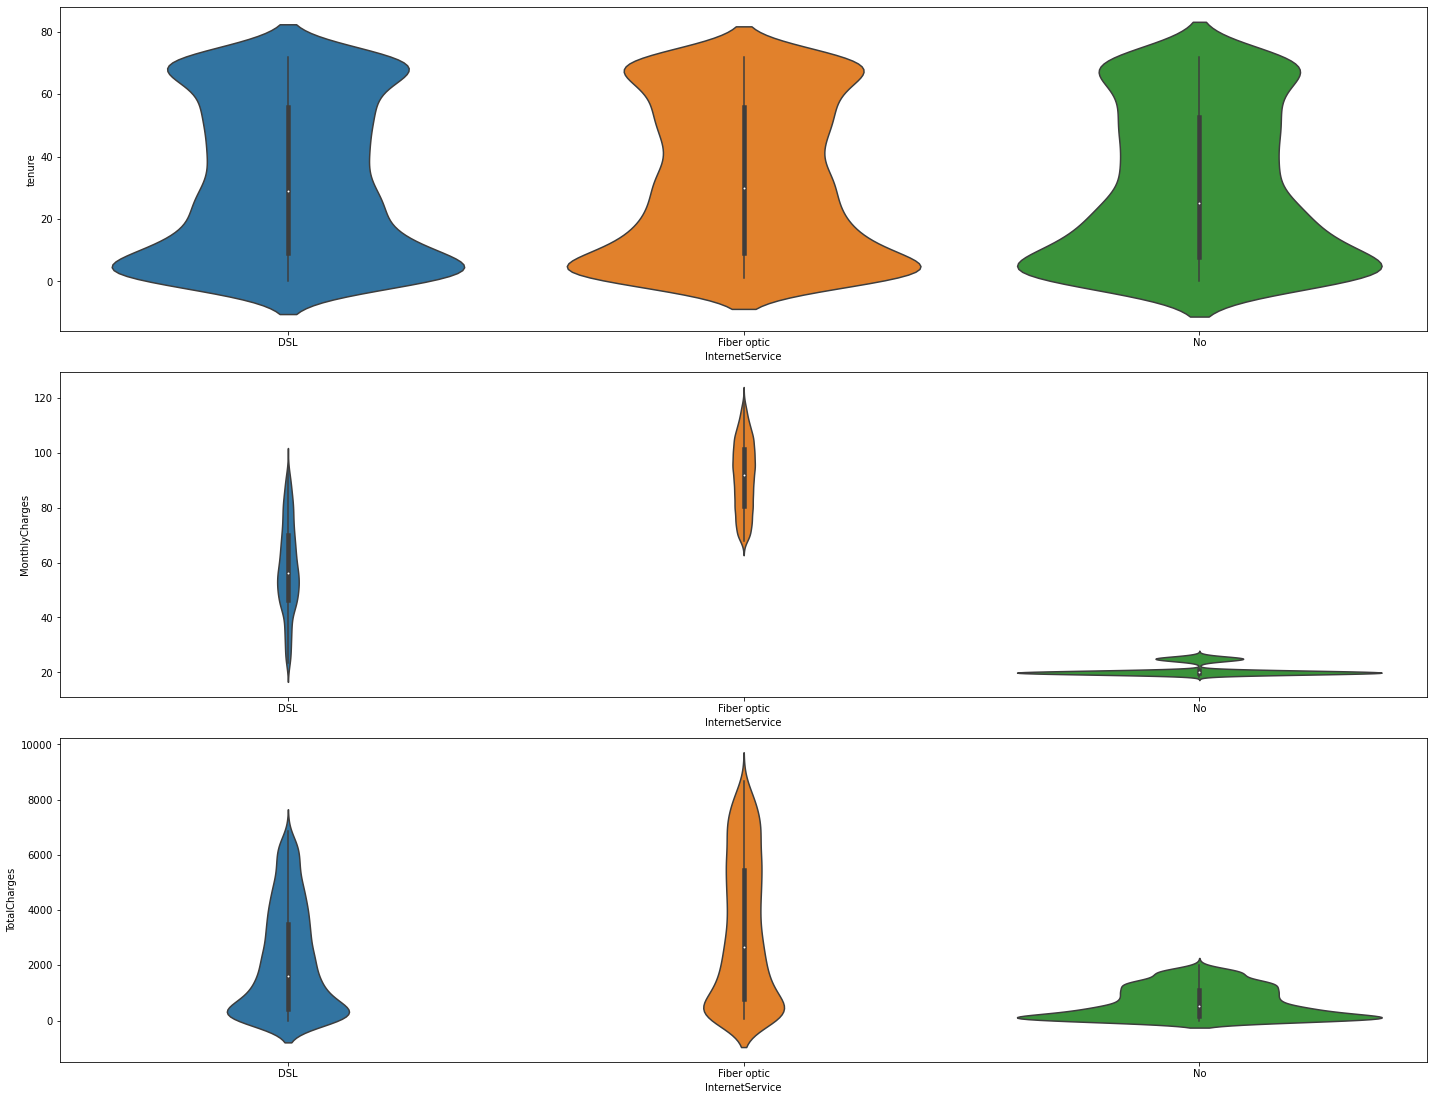

None

In [494]:
violine_plots(data,
    labels = ['tenure', 'MonthlyCharges', 'TotalCharges'],
    class_column  = 'InternetService')

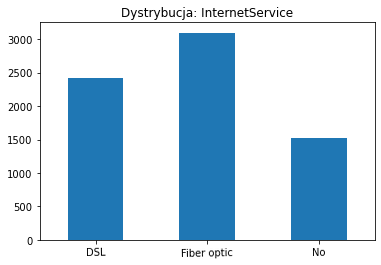

In [495]:
cls_dist(data, 'InternetService')

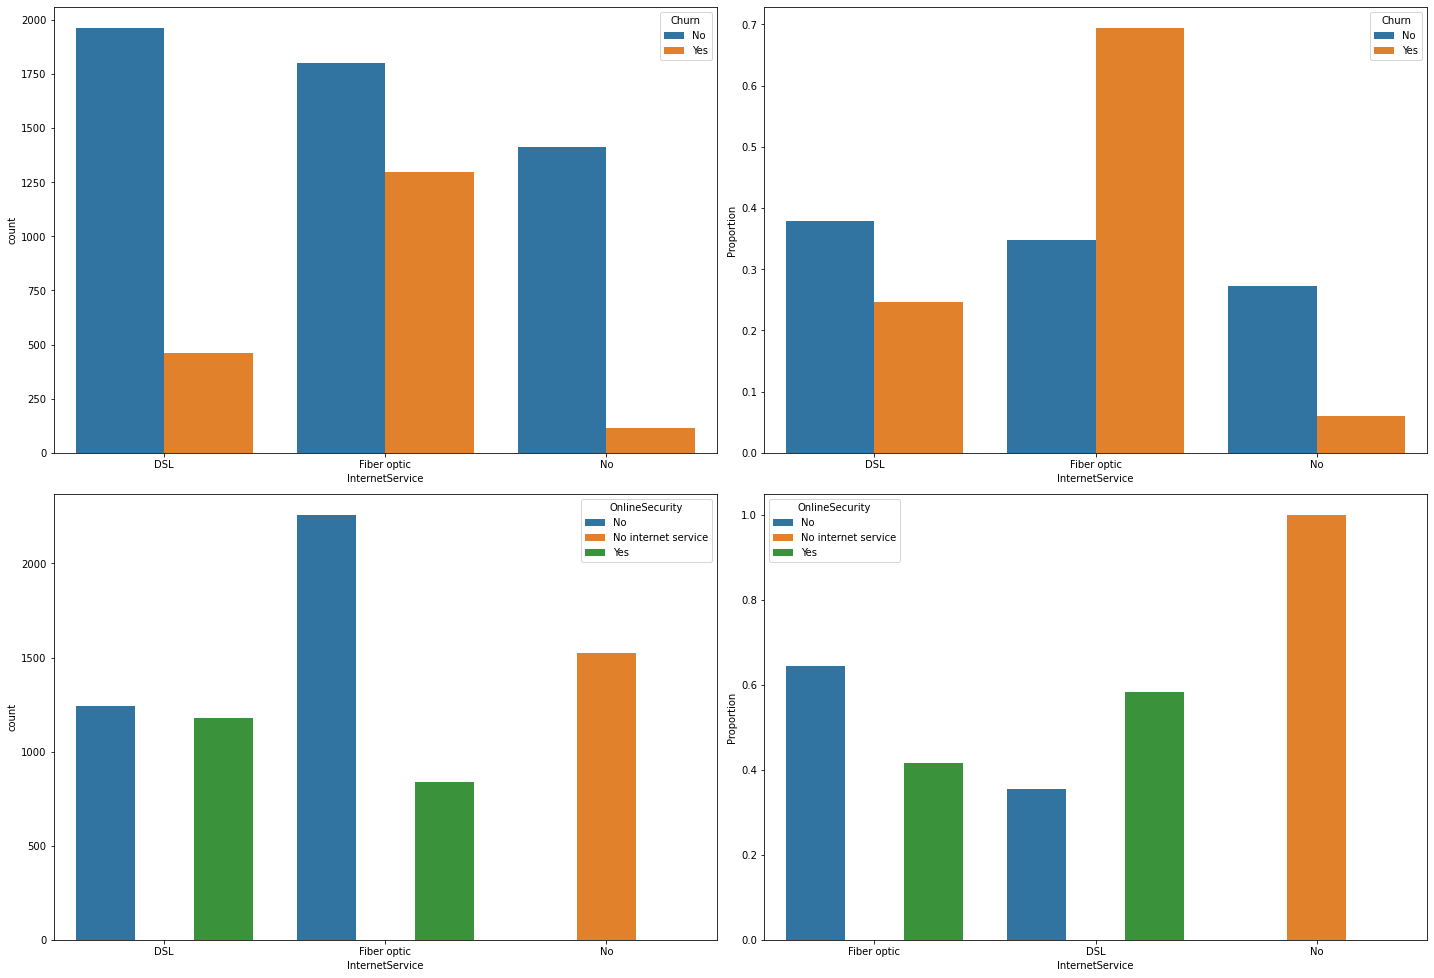

None

In [496]:
bar_plots(data, labels = ['Churn', 'OnlineSecurity'], class_column = 'InternetService')

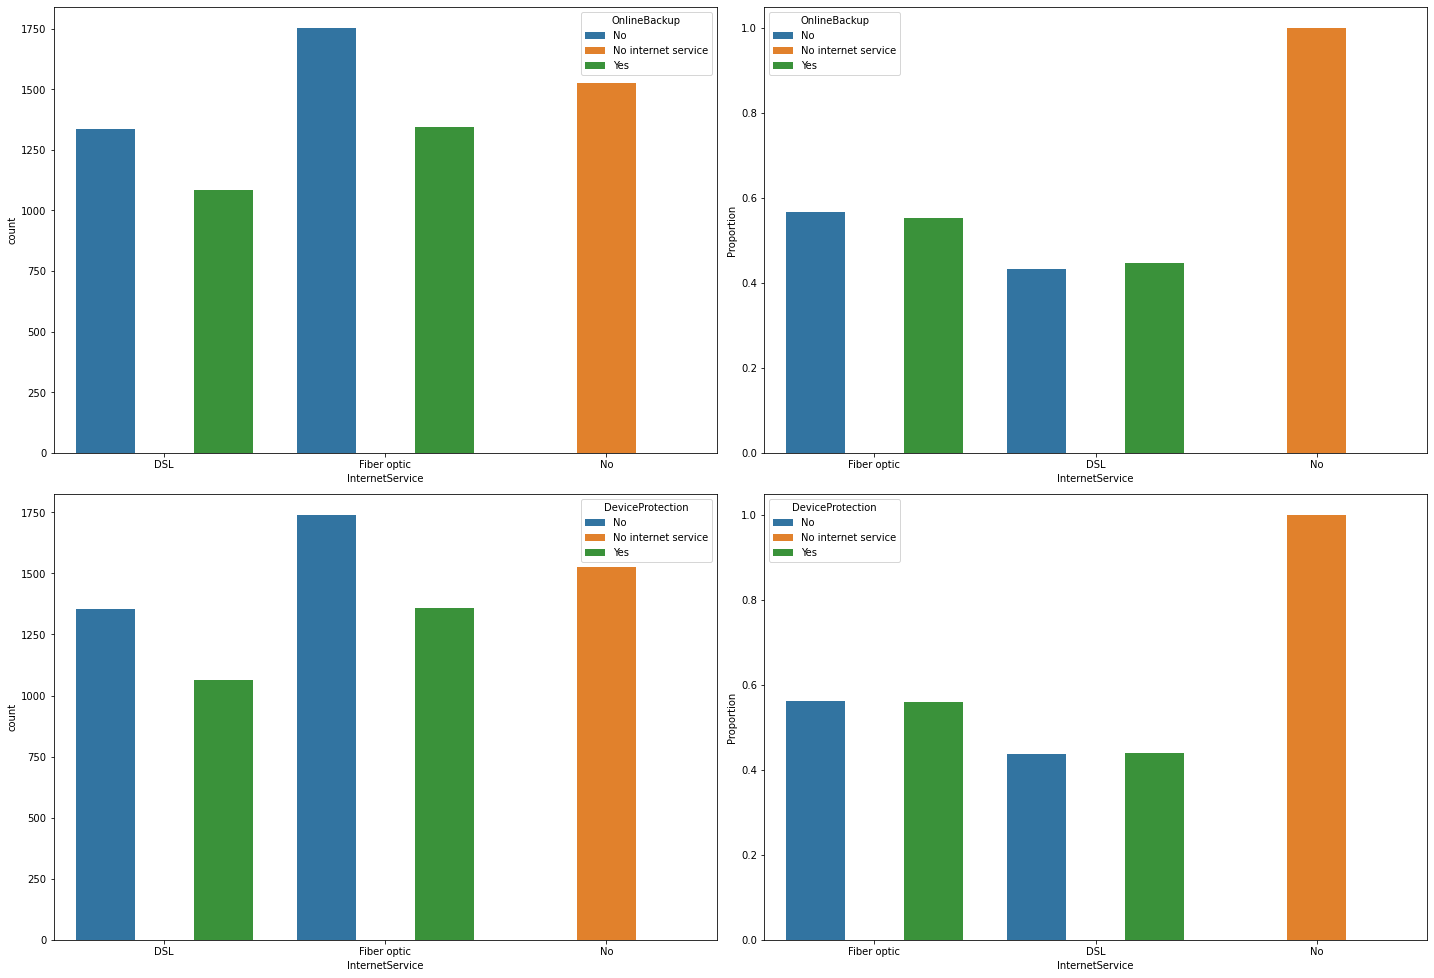

None

In [497]:
bar_plots(data, labels = ['OnlineBackup', 'DeviceProtection'], class_column= 'InternetService')

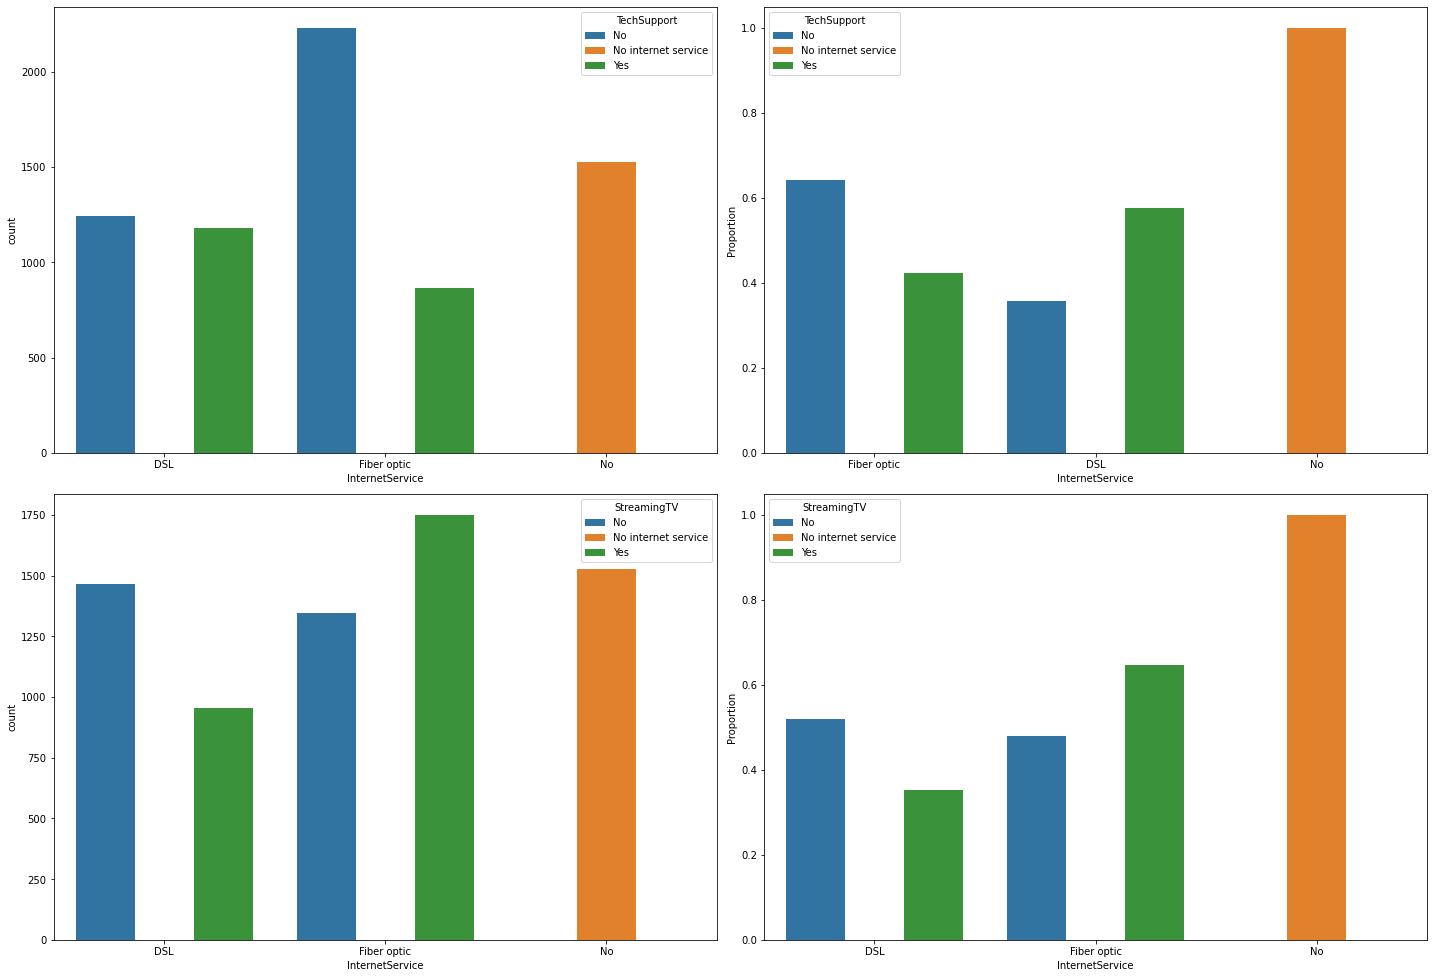

None

In [498]:
bar_plots(data, labels = ['TechSupport', 'StreamingTV'], class_column= 'InternetService')

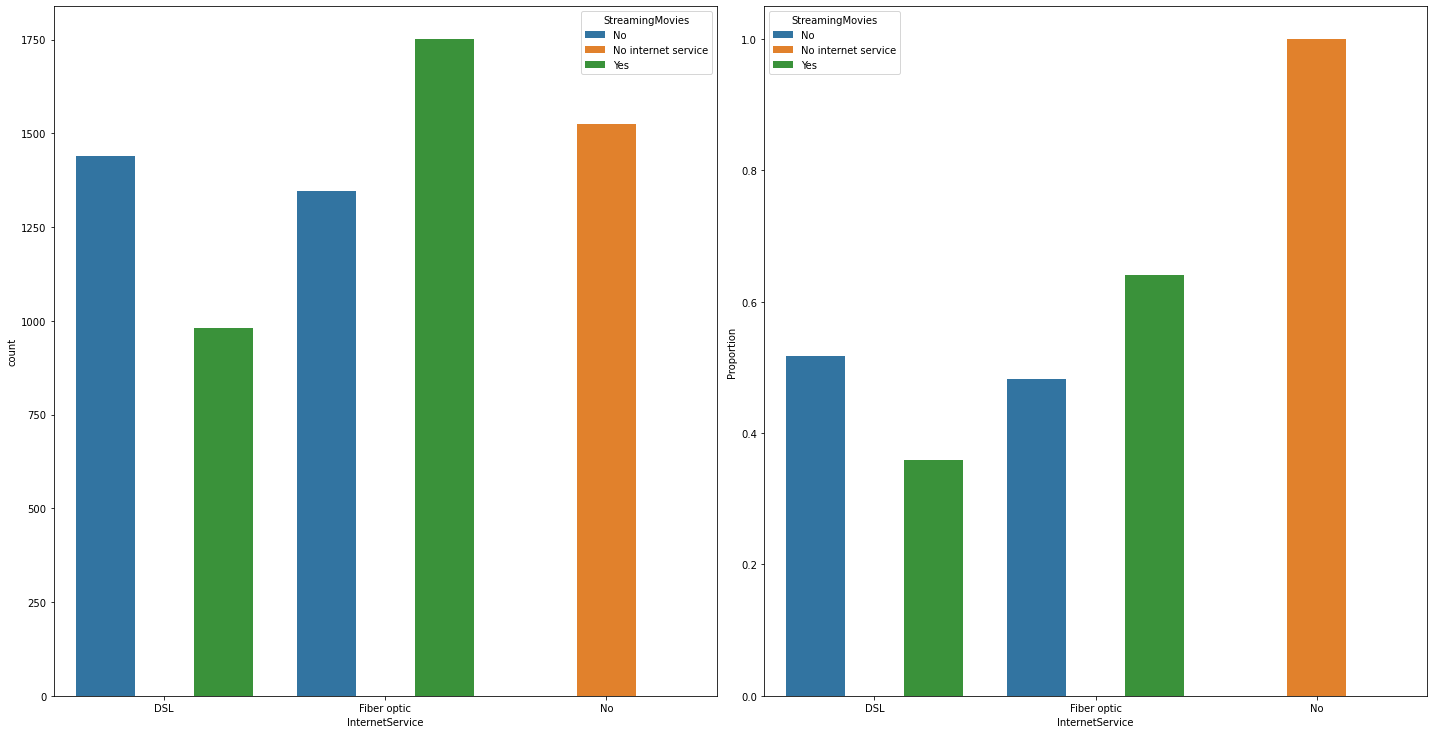

None

In [499]:
bar_plots(data, labels = [ 'StreamingMovies'], class_column= 'InternetService')

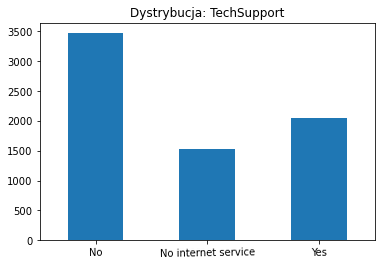

In [500]:
cls_dist(data, 'TechSupport')

### Account information

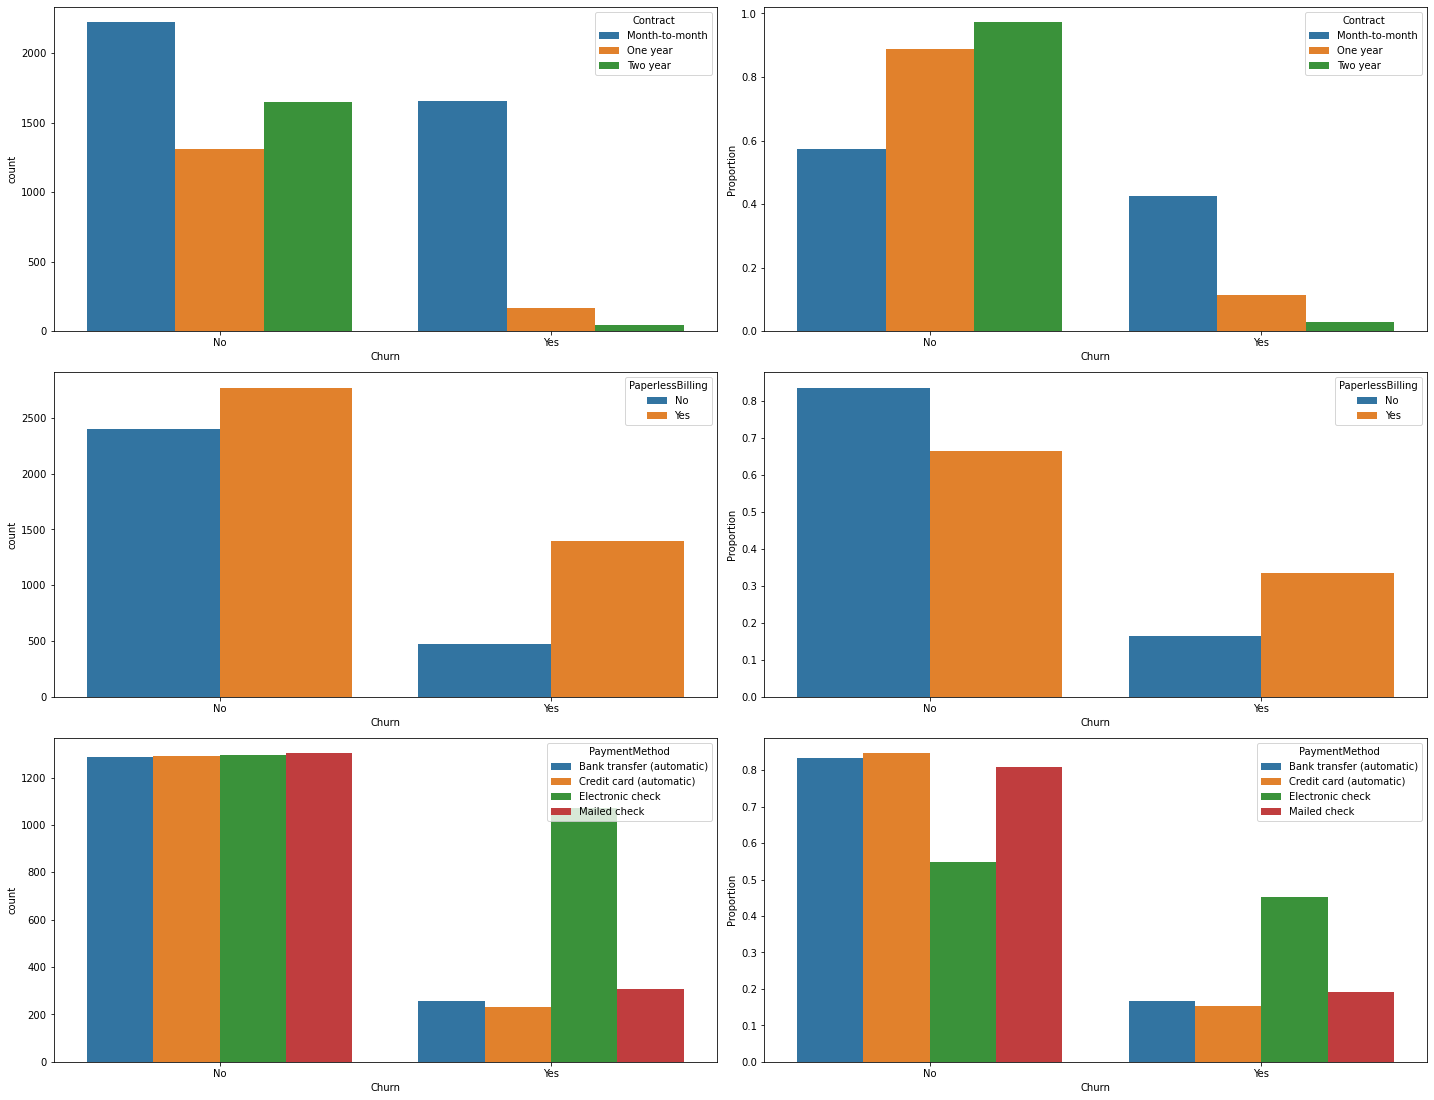

None

In [501]:
bar_plots(data, labels = ['Contract', 'PaperlessBilling', 'PaymentMethod'])

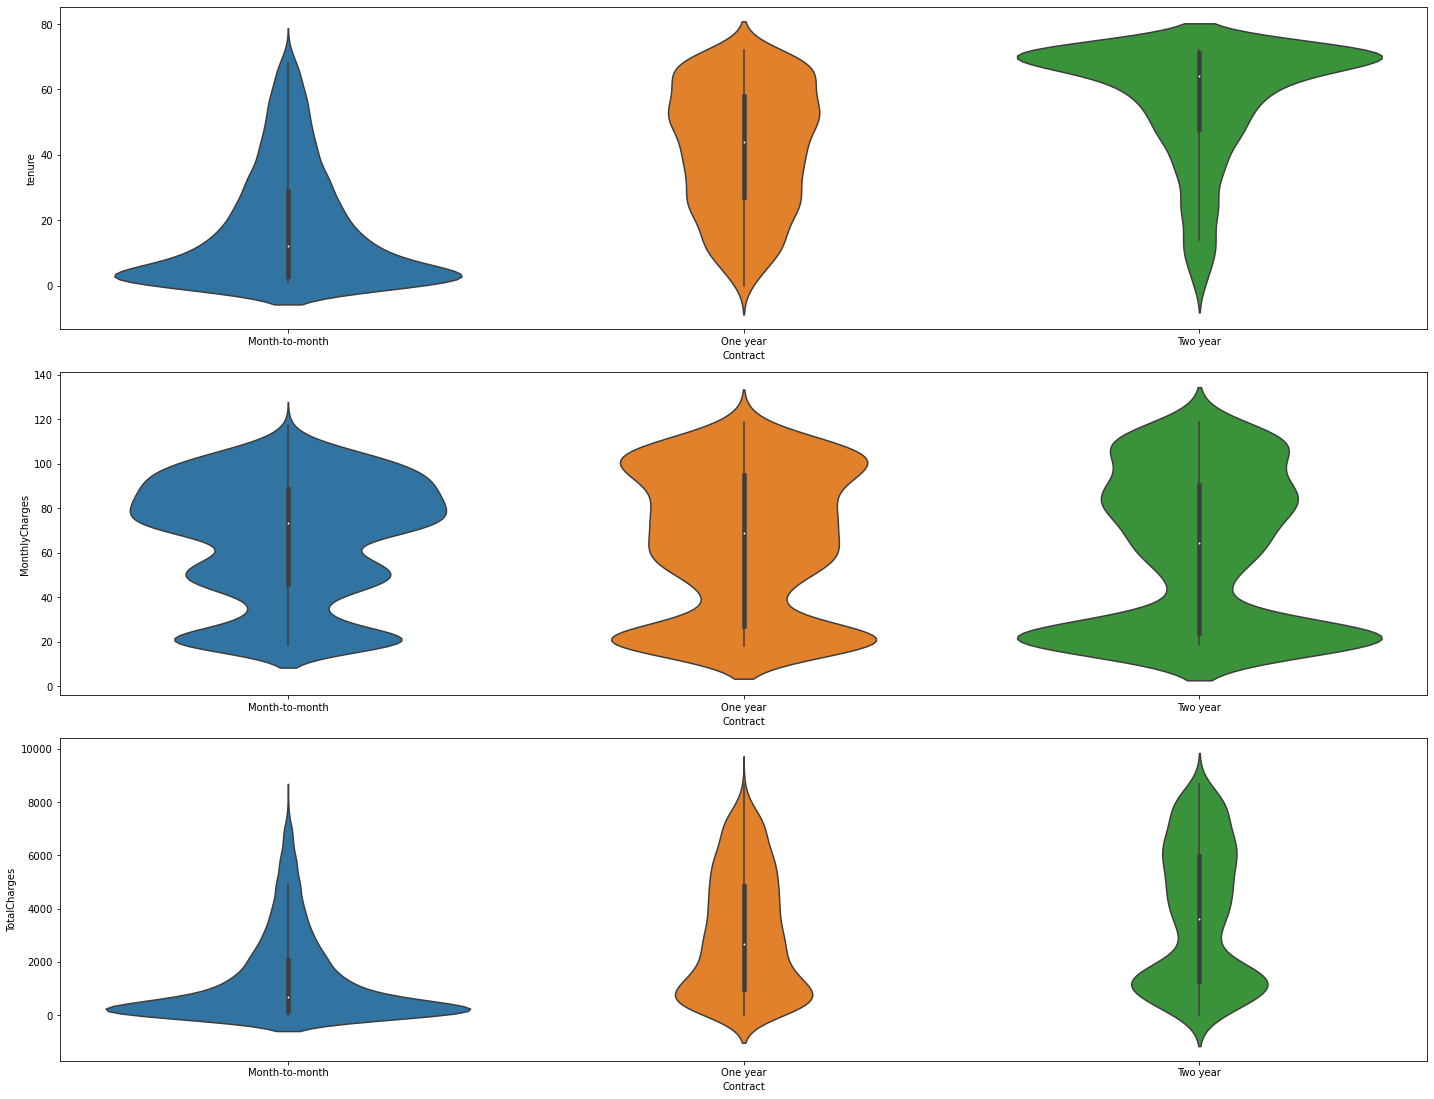

None

In [502]:
violine_plots(data,
    labels = ['tenure', 'MonthlyCharges', 'TotalCharges'],
    class_column  = 'Contract')

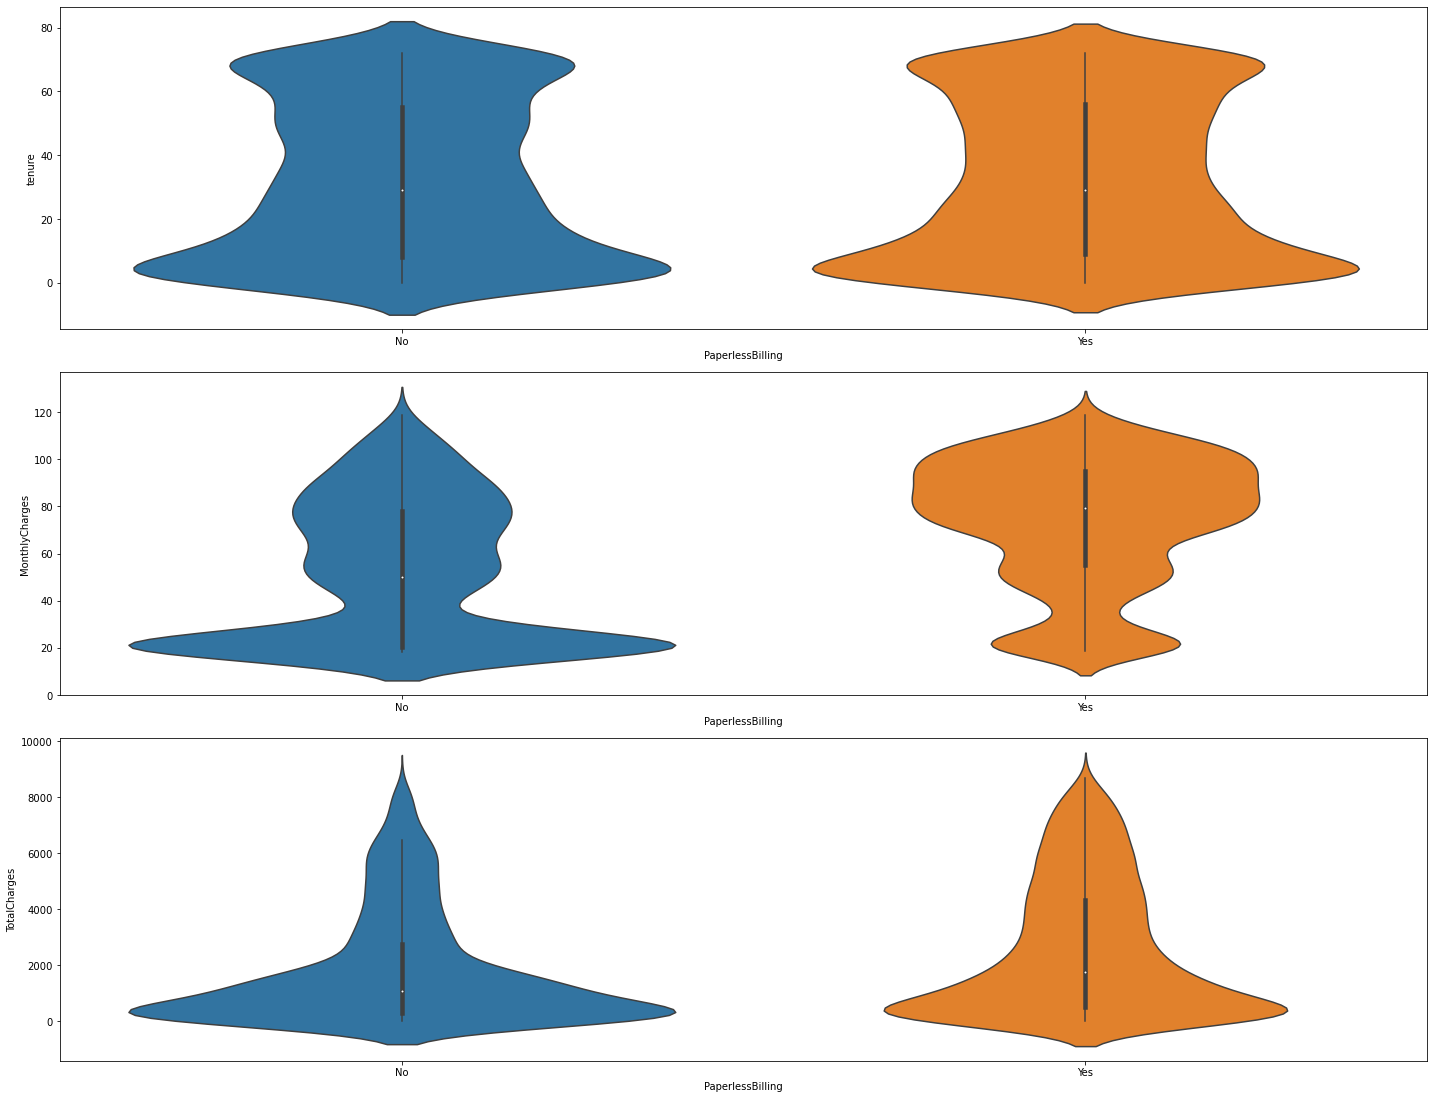

None

In [503]:
violine_plots(data,
    labels = ['tenure', 'MonthlyCharges', 'TotalCharges'],
    class_column  = 'PaperlessBilling')

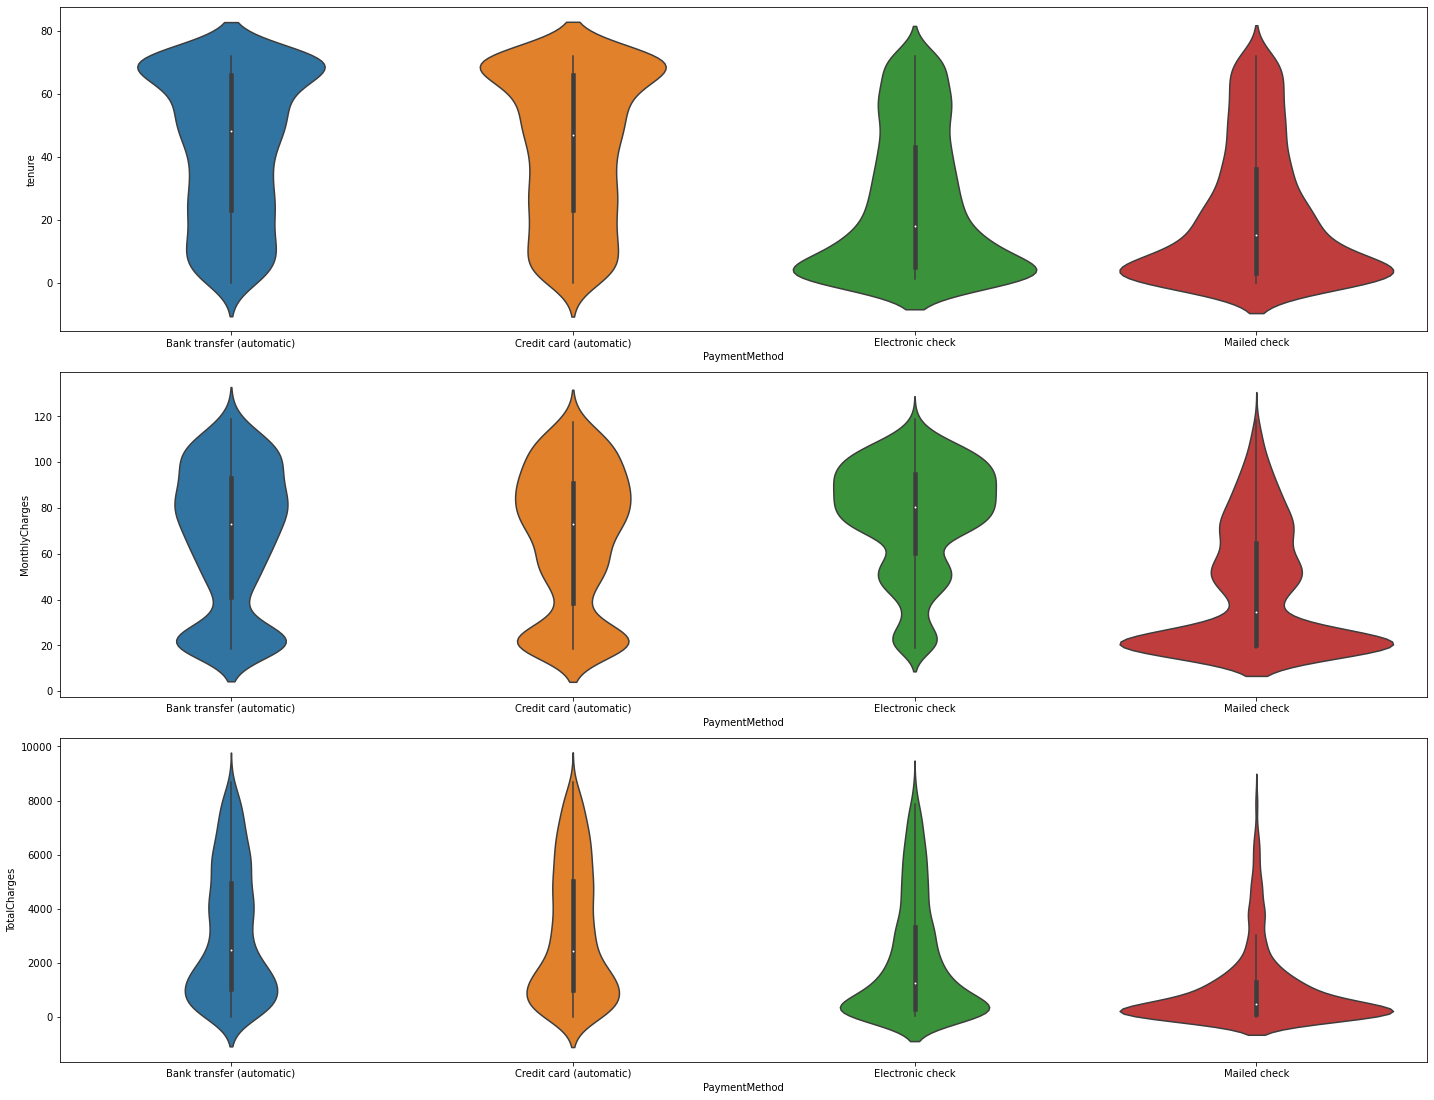

None

In [504]:
violine_plots(data,
    labels = ['tenure', 'MonthlyCharges', 'TotalCharges'],
    class_column  = 'PaymentMethod')

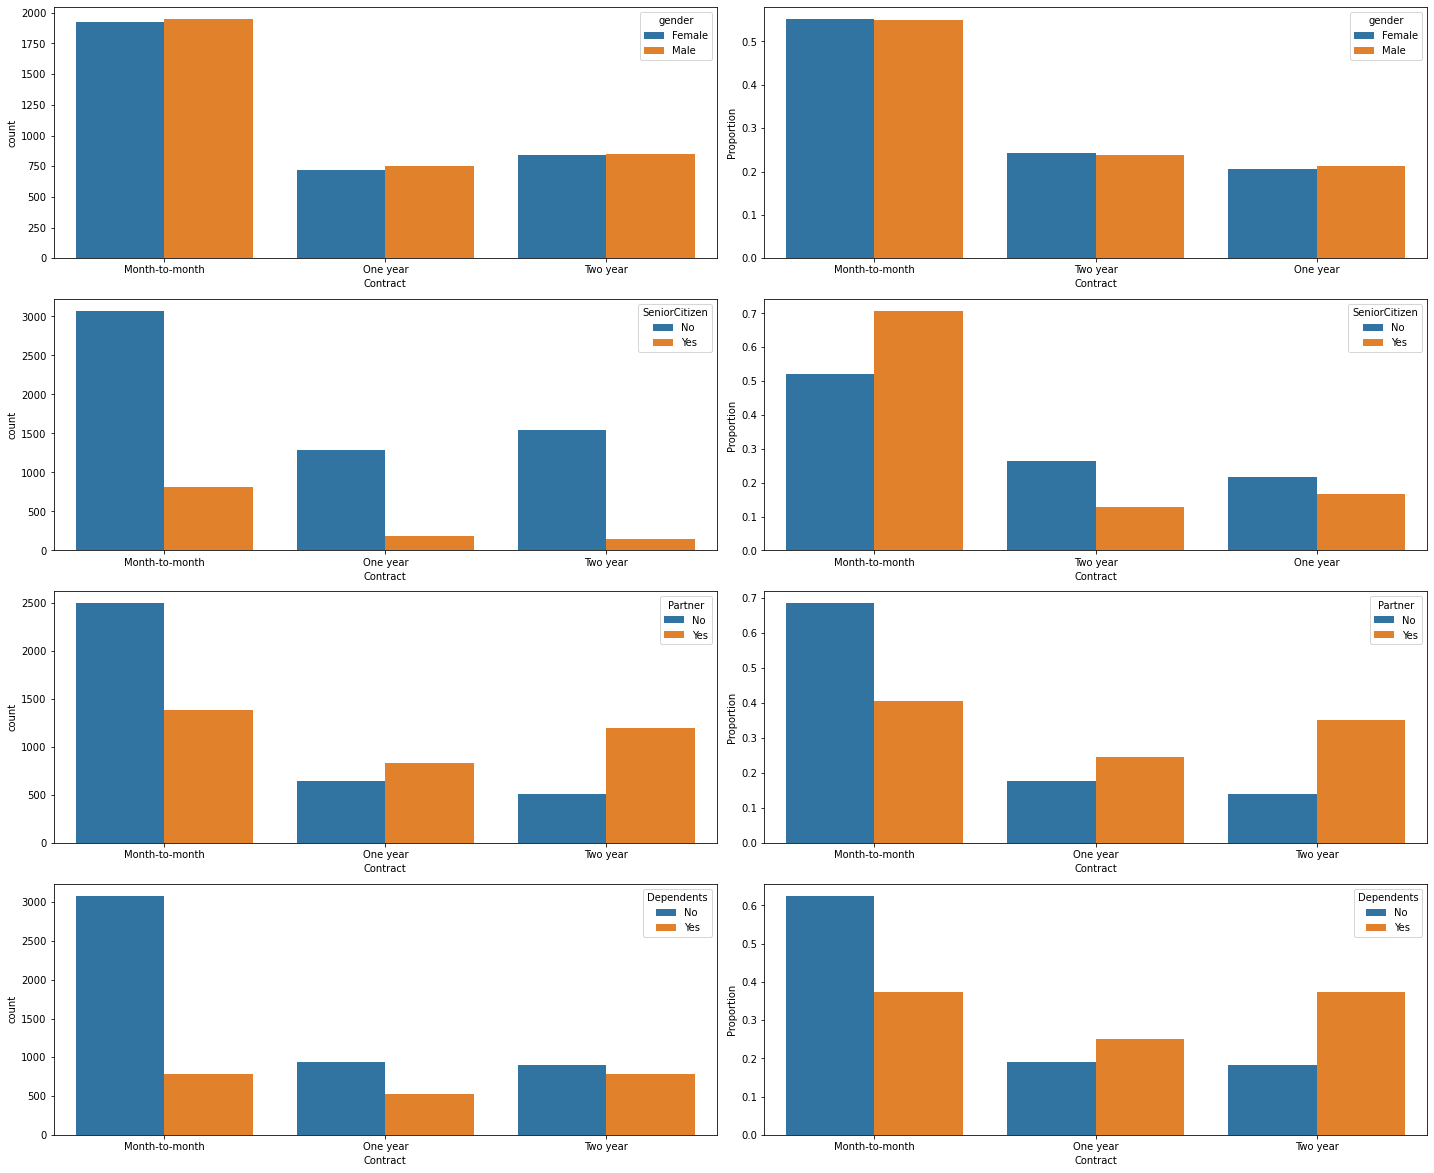

None

In [505]:
bar_plots(data, labels = ['gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_column = 'Contract')

# Feature engineering

Tutaj muszę jeszcze posprzątać i dokończyć. Oprócz tego warto jeszcze sprawdzić korelacje dla atrybutów kategorycznych, wartości odstające, redukcję wymiarowści.

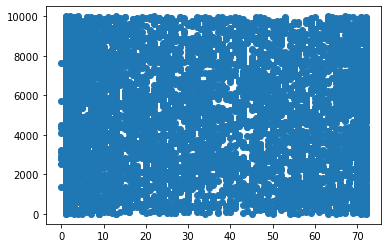

In [506]:
def add_id(row):
    row['id'] = row['customerID'][0:4]
    return row

data_id = data.apply(add_id, axis=1)
data_id['id'] = data_id['id'].astype('float64')
plt.scatter(data_id['tenure'], data_id['id'])

In [507]:
def add_extras(row):
    extras = 0
    for l in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
        if row[l] == 'Yes':
            extras += 1
    row['extras'] = extras
    return row

data_ex = data.apply(add_extras, axis=1)

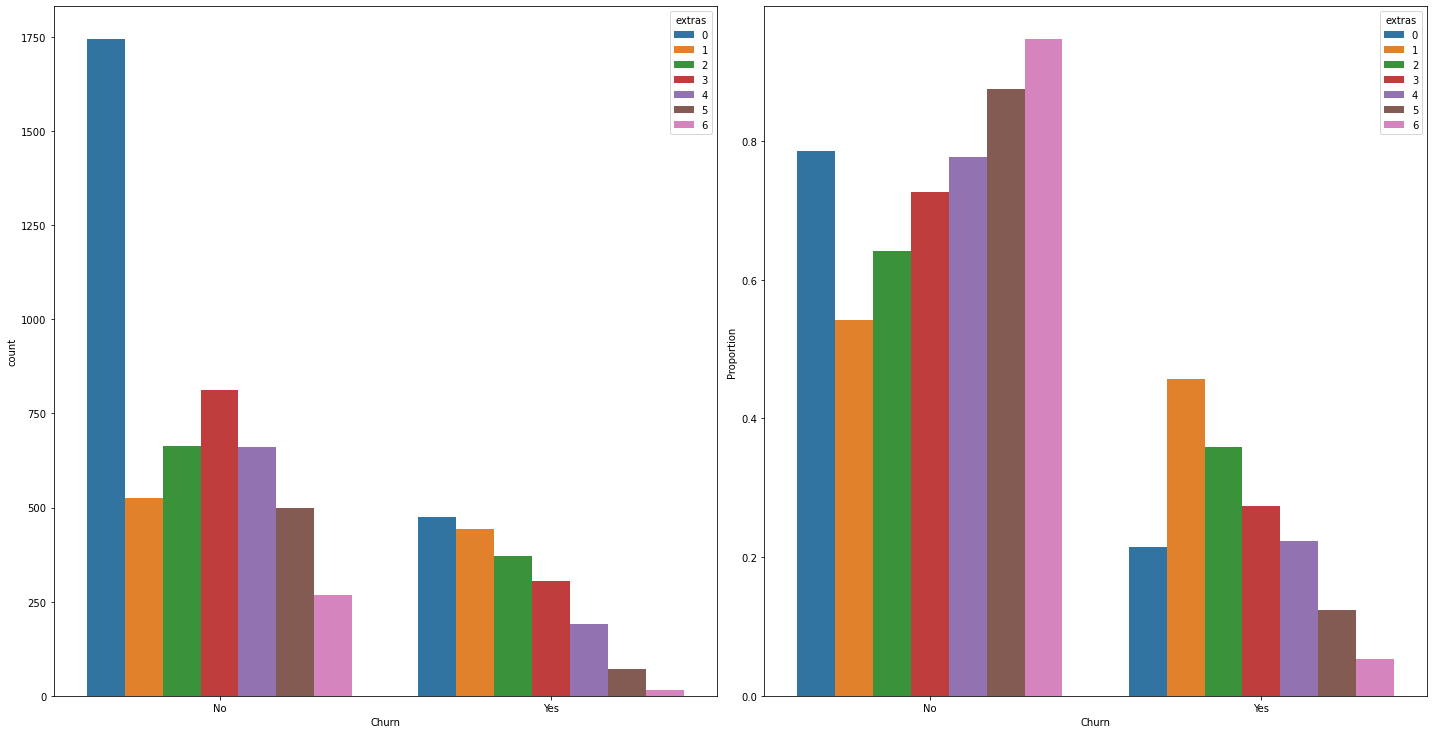

None

In [508]:
bar_plots(data_ex, labels = ['extras'])

In [509]:
def add_diff(row):
    row['diff'] = row['TotalCharges'] - row['tenure'] * row['MonthlyCharges']
    return row

data_diff = data.apply(add_diff, axis=1)

In [510]:
data_diff['diff'].describe()

count    7043.000000
mean        0.152953
std        67.202778
min      -370.850000
25%       -28.600000
50%         0.000000
75%        28.500000
max       373.250000
Name: diff, dtype: float64

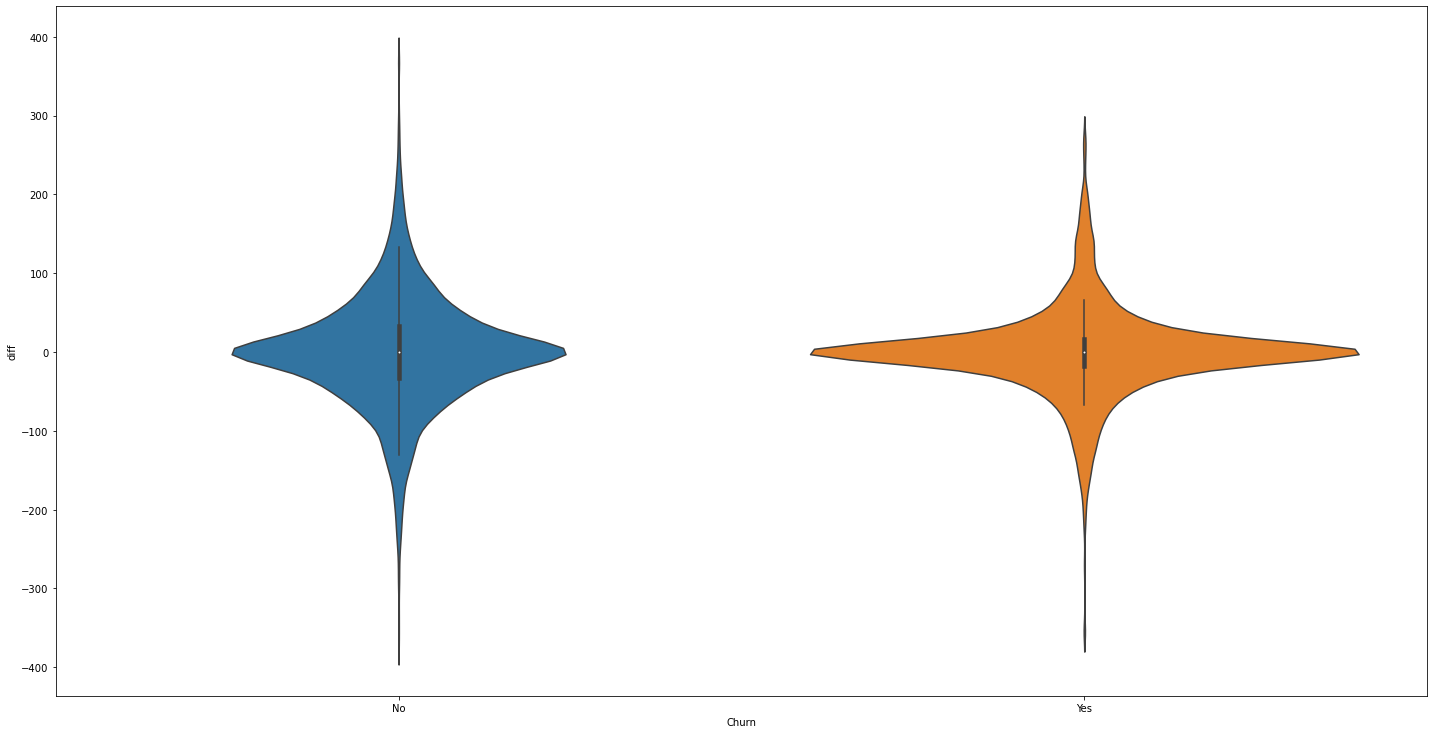

None

In [511]:
violine_plots(data_diff,
    labels = ['diff'])